<a href="https://colab.research.google.com/github/jsdysw/approaching_almost_any_mlp/blob/master/evaluation_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def accuracy(y_true, y_pred):
  correct_counter = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == yp:
      correct_counter += 1
  return correct_counter / len(y_true)

In [2]:
def true_positive(y_true, y_pred):
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 1:
      tp += 1
  return tp

def true_negative(y_true, y_pred):
  tn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 0:
      tn += 1
  return tn

def false_positive(y_true, y_pred):
  fp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 1:
      fp += 1
  return fp

def false_negative(y_true, y_pred):
  fn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt ==1 and yp == 0:
      fn += 1
  return fn

In [3]:
def accuracy_v2(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  accuracy_score = (tp + tn) / (tp + fp + tn + fn)
  return accuracy_score

In [4]:
def precision(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  precision = tp / (tp + fp)
  return precision

In [5]:
def recall(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  recall = tp / (tp + fn)
  return recall

#Precesion-recall graph




In [6]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

y_pred = [0.0263, 0.1111, 0.3162, 0.0490, 
          0.0191, 0.1755, 0.1595, 0.0381, 
          0.1163, 0.0793, 0.0858, 0.3909, 
          0.2725, 0.0344, 0.0464, 0.0354, 
          0.1852, 0.0593, 0.6197, 0.3305]

In [7]:
precisions = []
recalls = []
thresholds = [0.04, 0.05, 0.07, 
               0.08, 0.11, 0.15, 
               0.17, 0.18, 0.21, 
               0.27, 0.31, 0.33, 
               0.39, 0.61]

for i in thresholds:
  temp_prediction = [1 if x >= i else 0 for x in y_pred]
  p = precision(y_true, temp_prediction)
  r = recall(y_true, temp_prediction)
  precisions.append(p)
  recalls.append(r)

Text(0, 0.5, 'Precision')

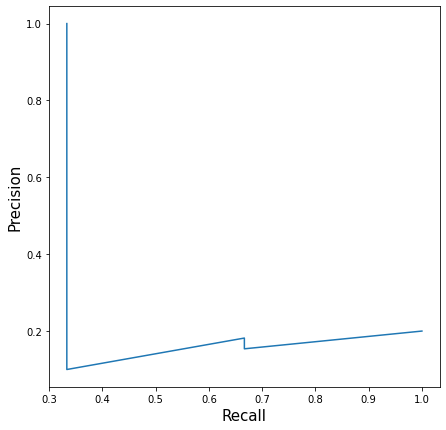

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

In [9]:
def f1(y_true, y_pred):
  p = precision(y_true, y_pred)
  r = recall(y_true, y_pred)

  score = 2 * p * r / (p + r)
  return score

#True positive rate (TPR)
- recall, sensitivity


In [10]:
def tpr(y_true, y_pred):
  return recall(y_true, y_pred)

# False positive rate (FPR)
- specificity, True Negative Rate

In [11]:
def fpr(y_true, y_pred):
  fp = false_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  return fp / (tn + fp)

#Receiver Operating Characteristic (ROC)

In [12]:
tpr_list = []
fpr_list = []

y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

for thresh in thresholds:
  temp_pred = [1 if x >= thresh else 0 for x in y_pred]
  temp_tpr = tpr(y_true, temp_pred)
  temp_fpr = fpr(y_true, temp_pred)
  tpr_list.append(temp_tpr)
  fpr_list.append(temp_fpr)

<function matplotlib.pyplot.show(*args, **kw)>

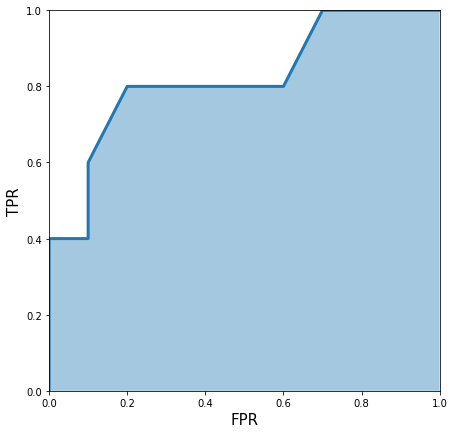

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show

If we calculate the area under this ROC curve, we are calculating **Area Under ROC Curve, Area Under Curve, AUC**

In [14]:
from sklearn import metrics
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

# Log Loss

In [15]:
import numpy as np

def log_loss(y_true, y_proba):
  epsilon = 1e-15
  loss = []
  for yt, yp in zip(y_true, y_proba):
    yp = np.clip(yp, epsilon, 1 - epsilon)
    temp_loss = -1.0 * (
        yt * np.log(yp)
        + (1 - yt) * np.log(1 - yp)
    )
    loss.append(temp_loss)
    
  return np.mean(loss)

# Multi-class classification


In [16]:
import numpy as np

def macro_precision(y_true, y_pred):
  num_classes = len(np.unique(y_true))
  precision = 0
  for class_ in range(num_classes):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    tp = true_positive(temp_true, temp_pred)
    fp = false_positive(temp_true, temp_pred)

    temp_precision = tp / (tp + fp)
    precision += temp_precision

  precision /= num_classes
  return precision

In [17]:
def micro_precision(y_true, y_pred):
  num_classes = len(np.unique(y_true))
  tp = 0
  fp = 0
  for class_ in range(num_classes):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    tp += true_positive(temp_true, temp_pred)
    fp += false_positive(temp_true, temp_pred)

  precision = tp / (tp + fp)
  return precision

In [18]:
from collections import Counter

def weighted_precision(y_true, y_pred):
  num_classes = len(np.unique(y_true))
  class_counts = Counter(y_true)  # {0:20, 1:15, 2:21}
  precision = 0
  for class_ in range(num_classes):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    tp = true_positive(temp_true, temp_pred)
    fp = false_positive(temp_true, temp_pred)
        
    temp_precision = tp / (tp + fp)
    weighted_precision = class_counts[class_] * temp_precision

    precision += weighted_precision
  
  overall_precision = precision / len(y_true)
  return overall_precision

In [19]:
from collections import Counter
import numpy as np

def weighted_f1(y_true, y_pred):
  num_classes = len(np.unique(y_true))
  class_counts = Counter(y_true)  # {0:20, 1:15, 2:21}
  f1 = 0
  for class_ in range(num_classes):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    p = precision(temp_true, temp_pred)
    r = recall(temp_true, temp_pred)

    if p + r != 0:
      temp_f1 = 2 * p * r / (p + r)
    else:
      temp_f1 = 0
    
    weighted_f1 = class_counts[class_] * temp_f1
    f1 += weighted_f1
  
  overall_f1 = f1 / len(y_true)
  return overall_f1